In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn import datasets

In [3]:
df=pd.read_csv('titanic/gender_submission.csv')

In [4]:
df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [5]:
df1=pd.read_csv('titanic/train.csv')

In [6]:
print(df1.columns)
df1.head()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df1.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df1['Age']=df1['Age'].fillna(np.mean(df1['Age']))

In [10]:
df1.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
df1.drop(columns='Cabin',inplace=True)

In [12]:
#drop Null values
df1=df1.dropna()
df1.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [13]:
#drop duplicates
df1=df1.drop_duplicates()

In [17]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [54]:
df1.groupby('Embarked').count()['Age']

Embarked
C    168
Q     77
S    644
Name: Age, dtype: int64

'S'

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compare the Parameters using Histogram and Pie Charts - Technical Topic 1

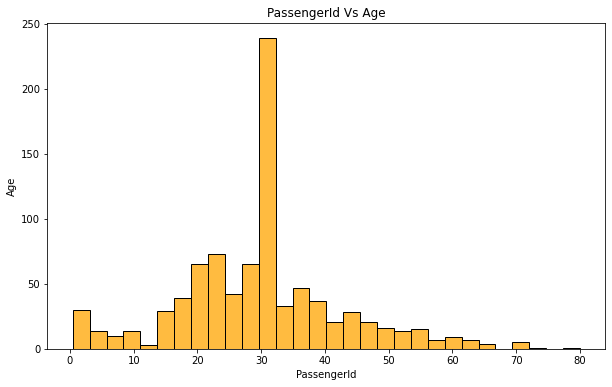

In [25]:
plt.figure(figsize=(10,6))
sns.histplot(x='Age',data=df1,color='orange')
plt.title("PassengerId Vs Age")
plt.xlabel("PassengerId")
plt.ylabel("Age")
plt.show()

# Pie Plot

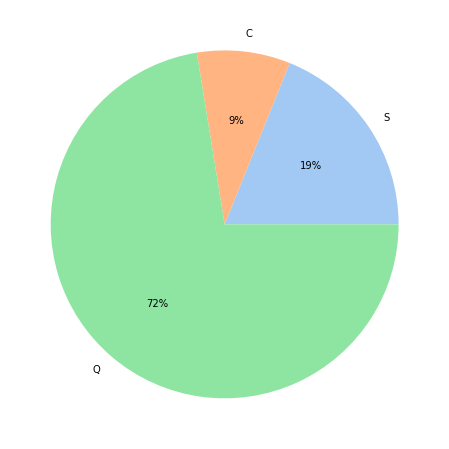

In [62]:
plt.figure(figsize=(8,8))
colors = sns.color_palette('pastel')[0:5]
labels=df1['Embarked'].unique()
plt.pie(df1.groupby('Embarked').count()['Age'],labels=labels,colors=colors,data=df1,autopct='%.0f%%')
plt.show()

#  Compare the Parameters using Bar Charts and Violin Plots - Technical Topic 2

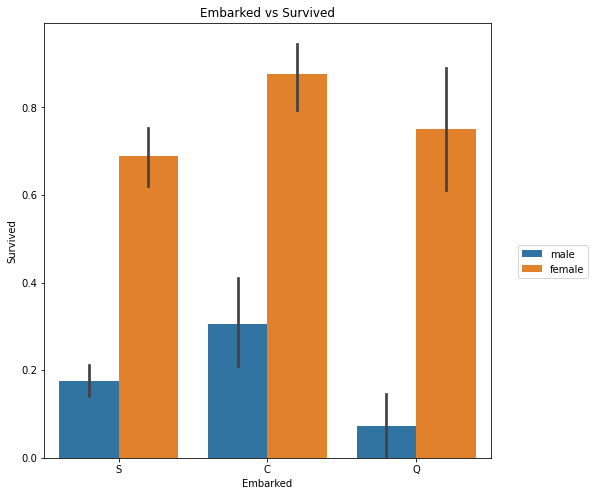

In [126]:
plt.figure(figsize=(8,8))
plt.title("Embarked vs Survived")
sns.barplot(y=df1['Survived'],x=df1['Embarked'],hue=df1['Sex'])
plt.legend(bbox_to_anchor=(1.05,.5))
plt.show()

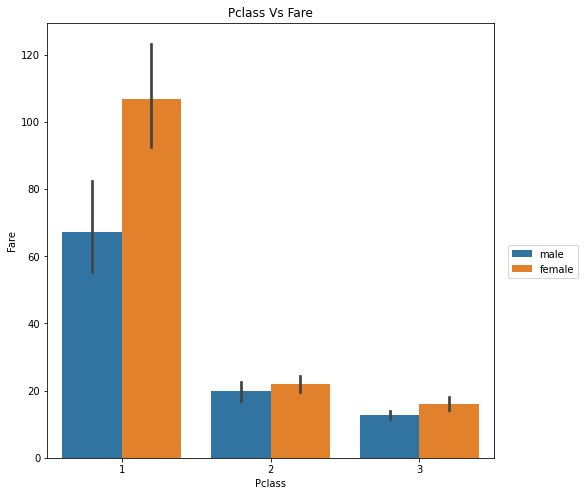

In [88]:
plt.figure(figsize=(8,8))
plt.title("Pclass Vs Fare")
sns.barplot(y=df1['Fare'],x=df1['Pclass'],hue=df1['Sex'])
plt.legend(bbox_to_anchor=(1.2,0.5))
plt.show()

# Violin Plot

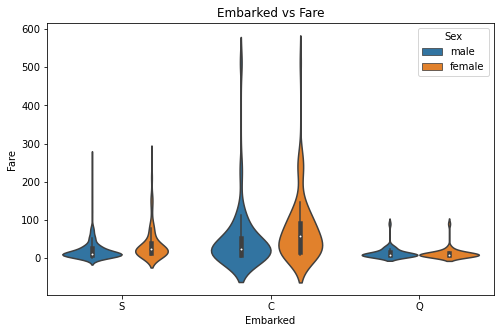

In [97]:
plt.figure(figsize=(8,5))
plt.title("Embarked vs Fare")
sns.violinplot(data=df1,y=df1['Fare'],x=df1['Embarked'],hue=df1['Sex'])
plt.show()

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 70.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 23.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 54.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


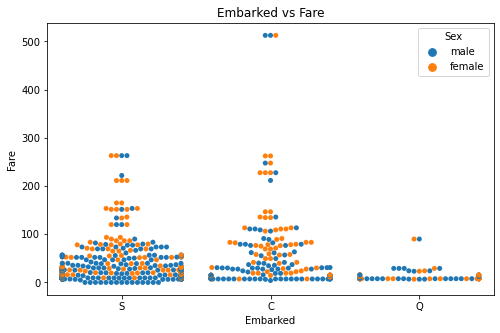

In [98]:
plt.figure(figsize=(8,5))
plt.title("Embarked vs Fare")
sns.swarmplot(data=df1,y=df1['Fare'],x=df1['Embarked'],hue=df1['Sex'])
plt.show()

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


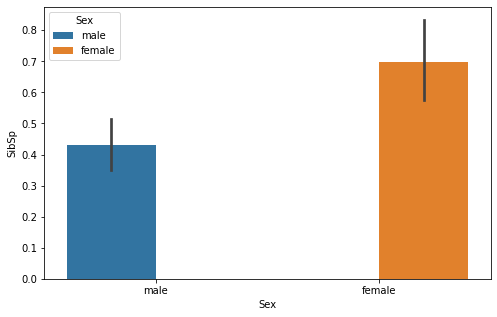

In [100]:
#Box plot 
plt.figure(figsize=(8,5))
sns.barplot(df1['Sex'],df1['SibSp'],hue=df1['Sex'],data=df1)
plt.show()

<AxesSubplot:title={'center':'Countplot of Survived'}, xlabel='Survived', ylabel='count'>

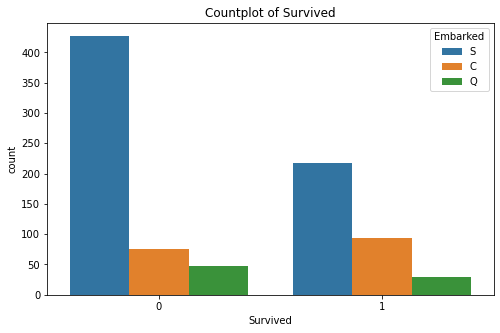

In [111]:
plt.figure(figsize=(8,5))
plt.title("Countplot of Survived")
sns.countplot(x=df1['Survived'],data=df1,hue=df1['Embarked'])

# Compare the Parameters using Scatter Plots and Box Plots - Technical Topic 3

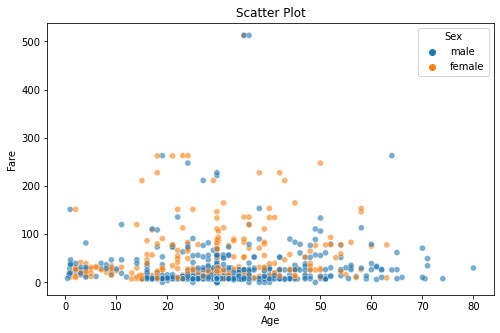

In [124]:
plt.figure(figsize=(8,5))
plt.title("Scatter Plot")
sns.scatterplot(data=df1,x=df1['Age'],y=df1['Fare'],hue=df1['Sex'],alpha=.6)
plt.show()

In [132]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# Boxplot

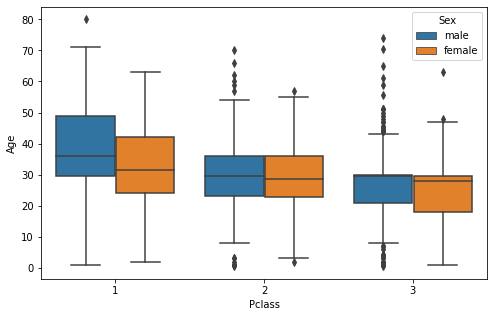

In [131]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df1,x=df1['Pclass'],y=df1['Age'],hue=df1['Sex'])
plt.show()

   # Generate the Heatmap, Correlation Matrix and precisely mention the findings about the Datasets

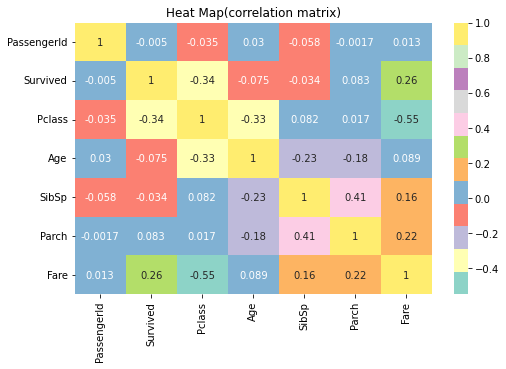

In [144]:
plt.figure(figsize=(8,5))
plt.title("Heat Map(correlation matrix)")
sns.heatmap(df1.corr(),annot=True,cmap='Set3')
plt.show()